In [ ]:
! pip install prince
! pip install kmodes

In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
import prince
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
## Most data cleansing was conducted in R, I selected a subset of variables to work with and loaded them in the form of two dataframes

In [127]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

In [149]:
df = pd.read_csv("dataset.csv")

In [77]:
df1.drop("Unnamed: 0",axis=1,inplace=True)
df1.drop_duplicates(inplace=True)
df1.head()

WRKLOSS  RRACE  WEEK  ...  ANXIOUS_DISORDER  DEPRESSION_DISORDER  EEDUC
0        2      1     1  ...              True                 True      3
1        1      1     1  ...              True                 True      3
2        1      1     1  ...              True                 True      3
3        1      1     1  ...              True                 True      3
4        1      1     1  ...             False                False      3

[5 rows x 11 columns]

In [128]:
df2.drop("Unnamed: 0",axis=1,inplace=True)
df2.drop_duplicates(inplace=True)
df2.head()

KINDWORK  ANXIOUS_DISORDER  DEPRESSION_DISORDER  WRKLOSS
0         2              True                False        2
1         3             False                False        2
4         2             False                False        2
6         2             False                False        1
7         2              True                 True        1

# KModes Clustering

## 1. Choosing n clusters

In [174]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df1_sample)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1371543.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1227164.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1186368.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1146335.0


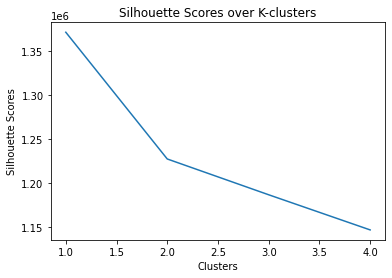

In [175]:
plt.title('Silhouette Scores over K-clusters')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Scores')
plt.plot(list(range(1,5)),cost)

In [167]:
variables = ['WRKLOSS','RRACE','WEEK','newRegion','EGENDER','Food_Insecurity','RSNNOWRK','FOODCONF','EEDUC']
df1_sample = df1.loc[:,variables]
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df1_sample)
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df1_sample.columns
clusterCentroidsDf.head()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 998774.0


WRKLOSS  RRACE  WEEK  newRegion  ...  Food_Insecurity  RSNNOWRK  FOODCONF  EEDUC
0        1      1     3          2  ...                1         5         2      3
1        2      1     8          4  ...                5         1         3      4

[2 rows x 9 columns]

In [169]:
df1_sample = df1_sample.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df1_sample, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.drop("Unnamed: 0",axis=1,inplace=True)
combinedDf.head()

WRKLOSS  RRACE  WEEK  ...  FOODCONF  EEDUC  cluster_predicted
0        2      1     1  ...         2      3                  0
1        1      1     1  ...         2      3                  0
2        1      1     1  ...         2      3                  0
3        1      1     1  ...         2      3                  0
4        1      1     1  ...         3      3                  0

[5 rows x 10 columns]

In [186]:
new_df1_k = pd.DataFrame({
    'id' : clustersDf.index,
    'Workloss' : codes.WRKLOSS,
    'Race': codes.RRACE,
    'Region': codes.newRegion,
    'Gender': codes.EGENDER,
    'Food_Insecurity' : codes.Food_Insecurity,
    'No_Work_Reasons' : codes.RSNNOWRK,
    'Food_Conf' : codes.FOODCONF,
    "Education" : codes.EEDUC,
    'Anxiety': df1.ANXIOUS_DISORDER,
    'Depression':df1.DEPRESSION_DISORDER,
    'Pred_Class' : clustersDf.cluster_predicted
})

## Visualizing cluster predictions against actual anxiety/depressive groups

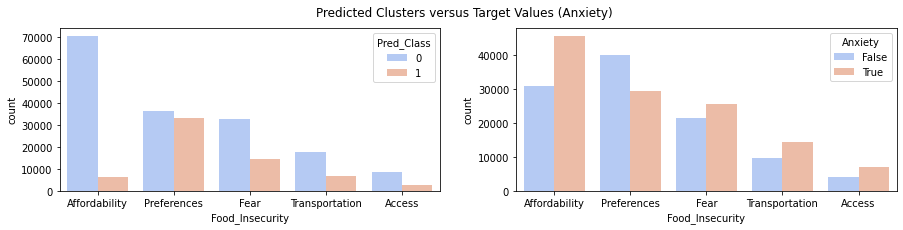

In [230]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Anxiety)")
sns.countplot(x=new_df1_k['Food_Insecurity'],order=new_df1_k['Food_Insecurity'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='coolwarm')
sns.countplot(x=new_df1_k['Food_Insecurity'],order=new_df1_k['Food_Insecurity'].value_counts().index,hue=new_df1_k['Anxiety'],ax=axes[1],palette='coolwarm')

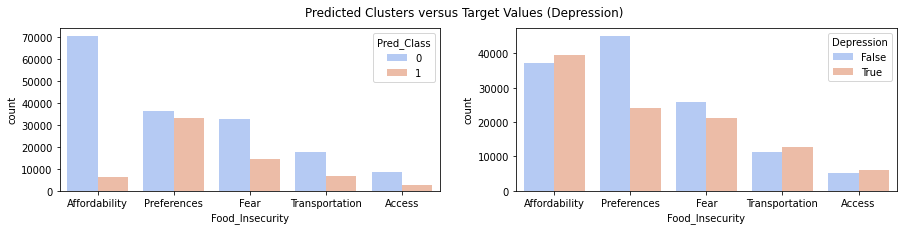

In [231]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Depression)")
sns.countplot(x=new_df1_k['Food_Insecurity'],order=new_df1_k['Food_Insecurity'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='coolwarm')
sns.countplot(x=new_df1_k['Food_Insecurity'],order=new_df1_k['Food_Insecurity'].value_counts().index,hue=new_df1_k['Depression'],ax=axes[1],palette='coolwarm')

[Text(0, 0, 'Somewhat Confident'),
 Text(0, 0, 'Moderately Confident'),
 Text(0, 0, 'Not Confident'),
 Text(0, 0, 'Very Confident')]

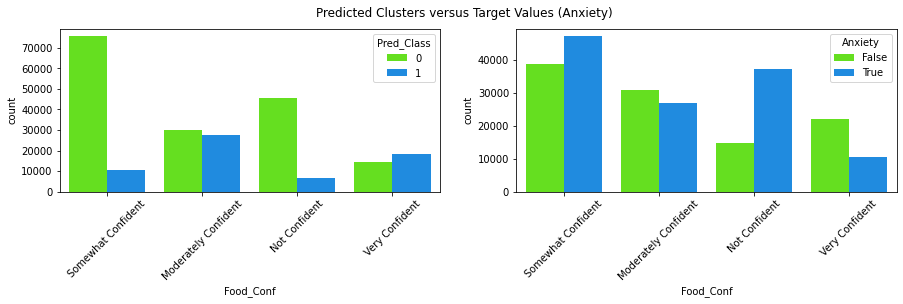

In [237]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Anxiety)")
chart1 = sns.countplot(x=new_df1_k['Food_Conf'],order=new_df1_k['Food_Conf'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='gist_rainbow')
chart2 = sns.countplot(x=new_df1_k['Food_Conf'],order=new_df1_k['Food_Conf'].value_counts().index,hue=new_df1_k['Anxiety'],ax=axes[1],palette='gist_rainbow')
chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=45
)
chart2.set_xticklabels(
    chart2.get_xticklabels(), 
    rotation=45
)

[Text(0, 0, 'Somewhat Confident'),
 Text(0, 0, 'Moderately Confident'),
 Text(0, 0, 'Not Confident'),
 Text(0, 0, 'Very Confident')]

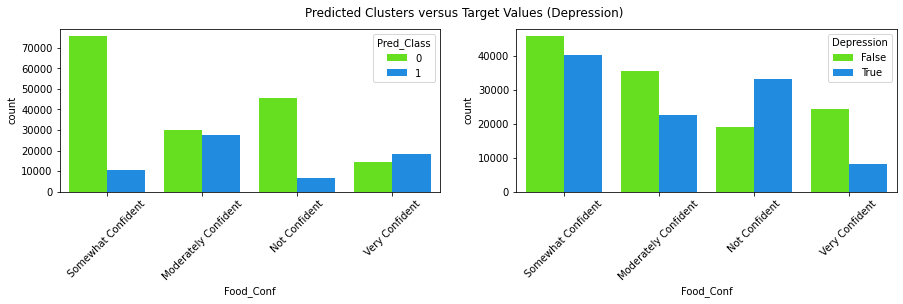

In [238]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Depression)")
chart1 = sns.countplot(x=new_df1_k['Food_Conf'],order=new_df1_k['Food_Conf'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='gist_rainbow')
chart2 = sns.countplot(x=new_df1_k['Food_Conf'],order=new_df1_k['Food_Conf'].value_counts().index,hue=new_df1_k['Depression'],ax=axes[1],palette='gist_rainbow')
chart1.set_xticklabels(
    chart1.get_xticklabels(), 
    rotation=45
)
chart2.set_xticklabels(
    chart2.get_xticklabels(), 
    rotation=45
)

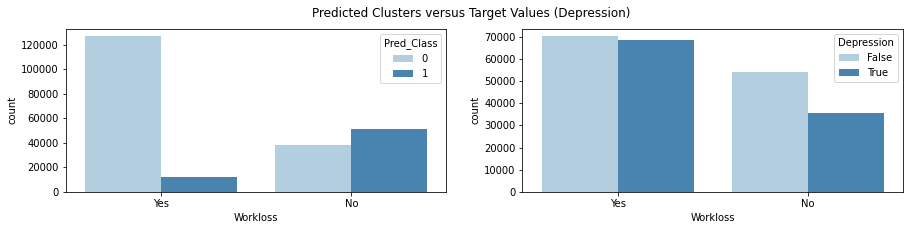

In [242]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Depression)")
sns.countplot(x=new_df1_k['Workloss'],order=new_df1_k['Workloss'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='Blues')
sns.countplot(x=new_df1_k['Workloss'],order=new_df1_k['Workloss'].value_counts().index,hue=new_df1_k['Depression'],ax=axes[1],palette='Blues')

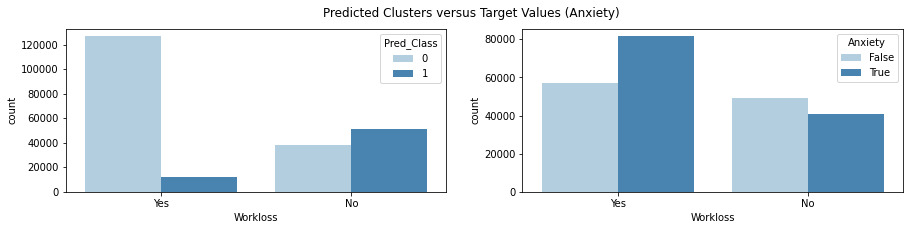

In [243]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Anxiety)")
sns.countplot(x=new_df1_k['Workloss'],order=new_df1_k['Workloss'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='Blues')
sns.countplot(x=new_df1_k['Workloss'],order=new_df1_k['Workloss'].value_counts().index,hue=new_df1_k['Anxiety'],ax=axes[1],palette='Blues')

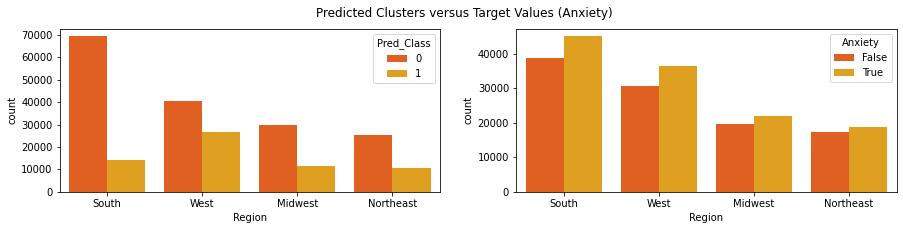

In [245]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Anxiety)")
sns.countplot(x=new_df1_k['Region'],order=new_df1_k['Region'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='autumn')
sns.countplot(x=new_df1_k['Region'],order=new_df1_k['Region'].value_counts().index,hue=new_df1_k['Anxiety'],ax=axes[1],palette='autumn')

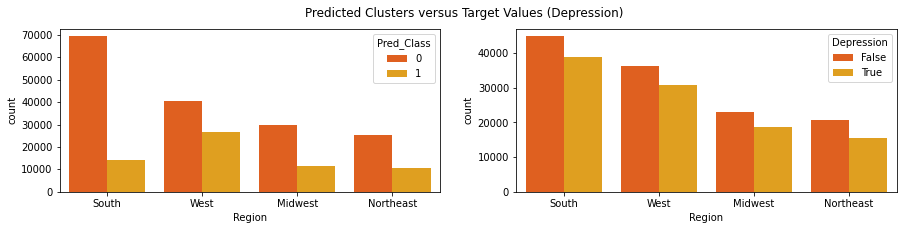

In [246]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Depression)")
sns.countplot(x=new_df1_k['Region'],order=new_df1_k['Region'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='autumn')
sns.countplot(x=new_df1_k['Region'],order=new_df1_k['Region'].value_counts().index,hue=new_df1_k['Depression'],ax=axes[1],palette='autumn')

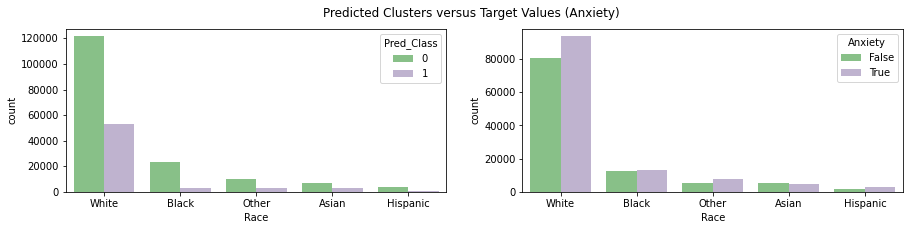

In [248]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Anxiety)")
sns.countplot(x=new_df1_k['Race'],order=new_df1_k['Race'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='Accent')
sns.countplot(x=new_df1_k['Race'],order=new_df1_k['Race'].value_counts().index,hue=new_df1_k['Anxiety'],ax=axes[1],palette='Accent')

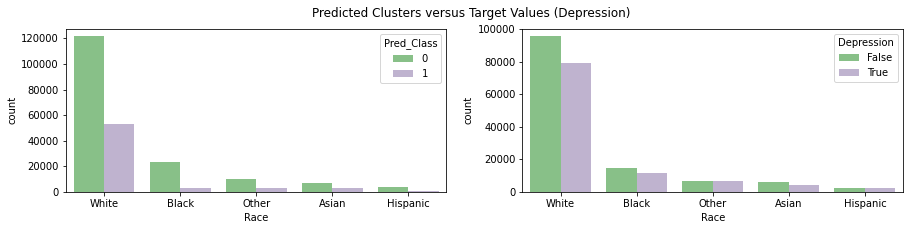

In [249]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Depression)")
sns.countplot(x=new_df1_k['Race'],order=new_df1_k['Race'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='Accent')
sns.countplot(x=new_df1_k['Race'],order=new_df1_k['Race'].value_counts().index,hue=new_df1_k['Depression'],ax=axes[1],palette='Accent')

[Text(0, 0, 'Employment COVID Impacted'),
 Text(0, 0, 'Chose Not to Work'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Caretaker'),
 Text(0, 0, 'Sick/Non-COVID'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Sick with COVID')]

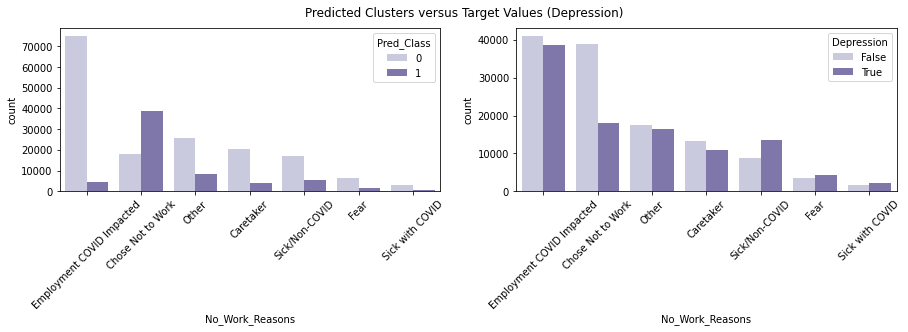

In [252]:
#No_Work_Reasons
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Depression)")
chart3=sns.countplot(x=new_df1_k['No_Work_Reasons'],order=new_df1_k['No_Work_Reasons'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='Purples')
chart4=sns.countplot(x=new_df1_k['No_Work_Reasons'],order=new_df1_k['No_Work_Reasons'].value_counts().index,hue=new_df1_k['Depression'],ax=axes[1],palette='Purples')
chart3.set_xticklabels(
    chart3.get_xticklabels(), 
    rotation=45
)
chart4.set_xticklabels(
    chart4.get_xticklabels(), 
    rotation=45
)

[Text(0, 0, 'Employment COVID Impacted'),
 Text(0, 0, 'Chose Not to Work'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Caretaker'),
 Text(0, 0, 'Sick/Non-COVID'),
 Text(0, 0, 'Fear'),
 Text(0, 0, 'Sick with COVID')]

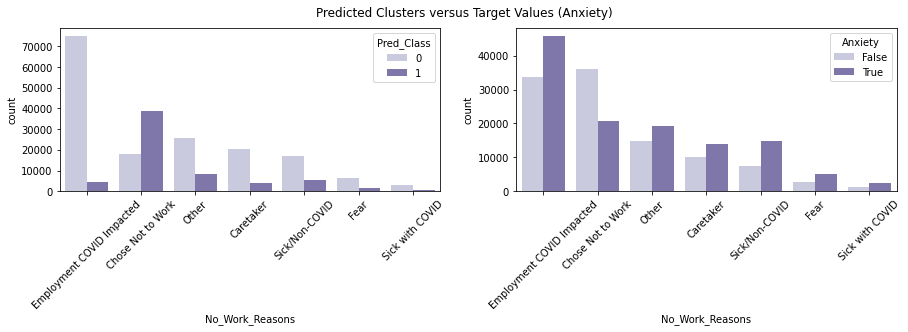

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
plt.suptitle("Predicted Clusters versus Target Values (Anxiety)")
chart3=sns.countplot(x=new_df1_k['No_Work_Reasons'],order=new_df1_k['No_Work_Reasons'].value_counts().index,hue=new_df1_k['Pred_Class'],ax=axes[0],palette='Purples')
chart4=sns.countplot(x=new_df1_k['No_Work_Reasons'],order=new_df1_k['No_Work_Reasons'].value_counts().index,hue=new_df1_k['Anxiety'],ax=axes[1],palette='Purples')
chart3.set_xticklabels(
    chart3.get_xticklabels(), 
    rotation=45
)
chart4.set_xticklabels(
    chart4.get_xticklabels(), 
    rotation=45
)

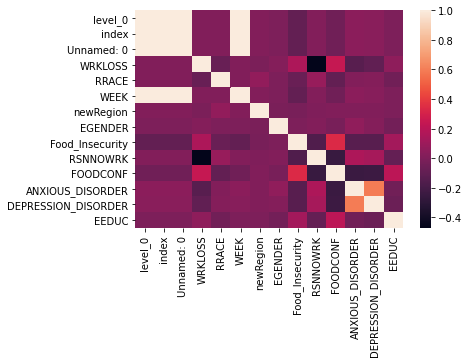

In [254]:
sns.heatmap(df1.corr())

# Step 1: MCA (PCA for Categorical Variables)

In [79]:
variables = ['WRKLOSS','RRACE','WEEK','newRegion','EGENDER','Food_Insecurity','RSNNOWRK','FOODCONF','EEDUC']
df1_sample = df1.loc[:,variables]
mca_ex = prince.MCA(n_components=2, n_iter=3, engine='auto', random_state=42)
mca_ex = mca_ex.fit_transform(df1_sample)

In [130]:
variables2 = ['KINDWORK','WRKLOSS']
df2_sample = df2.loc[:,variables2]
mca_ex2 = prince.MCA(n_components=2, n_iter=3, engine='auto', random_state=42)
mca_ex2 = mca_ex2.fit_transform(df2_sample)

In [178]:
codes = df1_sample.replace(
    {
        'WRKLOSS' : {1:'Yes',2:'No'},
        'EGENDER': {1:"Male",2:"Female"},
        'RRACE' : {1:'White', 2:'Black', 3:'Asian',4:'Hispanic',5:'Other'},
        'newRegion' : {1:'Northeast',2:'South',3:"Midwest",4:'West'},
        'Food_Insecurity' : {1:"Affordability",2:"Transportation", 3:"Fear", 4: "Access", 5 : "Preferences"},
        'RSNNOWRK': {1:"Chose Not to Work", 2: "Sick with COVID", 3:"Caretaker",4:"Sick/Non-COVID",5:"Employment COVID Impacted",6:"Other",7:"Fear"},
        'FOODCONF' : {1:"Not Confident",2:"Somewhat Confident",3:"Moderately Confident",4:"Very Confident"},
        'EEDUC' : {1:"Less than HS",2:"Highschool",3:"Some College",4:"College",5:"Graduate"}
    }
)

In [81]:
new_df1_mca = pd.DataFrame({
    'id' : df1_sample.index,
    'Workloss' : codes.WRKLOSS,
    'Race': codes.RRACE,
    'Week': df1_sample.WEEK,
    'Region': codes.newRegion,
    'Gender': codes.EGENDER,
    'Food_Insecurity' : codes.Food_Insecurity,
    'No_Work_Reasons' : codes.RSNNOWRK,
    'Food_Conf' : codes.FOODCONF,
    "Education" : codes.EEDUC,
    'Anxiety': df1.ANXIOUS_DISORDER,
    'Depression':df1.DEPRESSION_DISORDER,
    'x' : mca_ex[0],
    'y' : mca_ex[1]
})

In [133]:
codes2 = df2_sample.replace(
    {
        'WRKLOSS' : {1:'Yes',2:'No'},
        'KINDWORK' : {1:'Government',2:'Private',3:'Non-profit',4:'Self-employed',5:'Family-business'}
     
    }
)

In [135]:
new_df2_mca = pd.DataFrame({
    'id' : df2_sample.index,
    "Workloss" : codes2.WRKLOSS,
    "Occupation" : codes2.KINDWORK,
    "Anxiety" : df2.ANXIOUS_DISORDER,
    "Depression" : df2.DEPRESSION_DISORDER,
    'x' : mca_ex2[0],
    'y' : mca_ex2[1]
})

In [85]:
new_df1_mca.drop_duplicates(inplace=True)
new_df2_mca.drop_duplicates(inplace=True)

In [147]:
new_df1_mca.head()

id Workloss   Race  Week  ... Anxiety Depression         x         y
0   0       No  White     1  ...    True       True -0.421600  0.155444
1   1      Yes  White     1  ...    True       True -0.433434  0.292273
2   2      Yes  White     1  ...    True       True -0.500331  0.085210
3   3      Yes  White     1  ...    True       True -0.554486 -0.082413
4   4      Yes  White     1  ...   False      False -0.549519 -0.286793

[5 rows x 14 columns]

In [148]:
new_df2_mca.head()

id Workloss  Occupation  Anxiety  Depression             x    y
0   0       No     Private     True       False  3.535534e-01 -1.0
1   1       No  Non-profit    False       False  1.414214e-01 -1.0
4   4       No     Private    False       False  3.535534e-01 -1.0
6   6      Yes     Private    False       False  2.731995e-16 -1.0
7   7      Yes     Private     True        True  2.731995e-16 -1.0

## Visualizations for Food Insecurity Variables

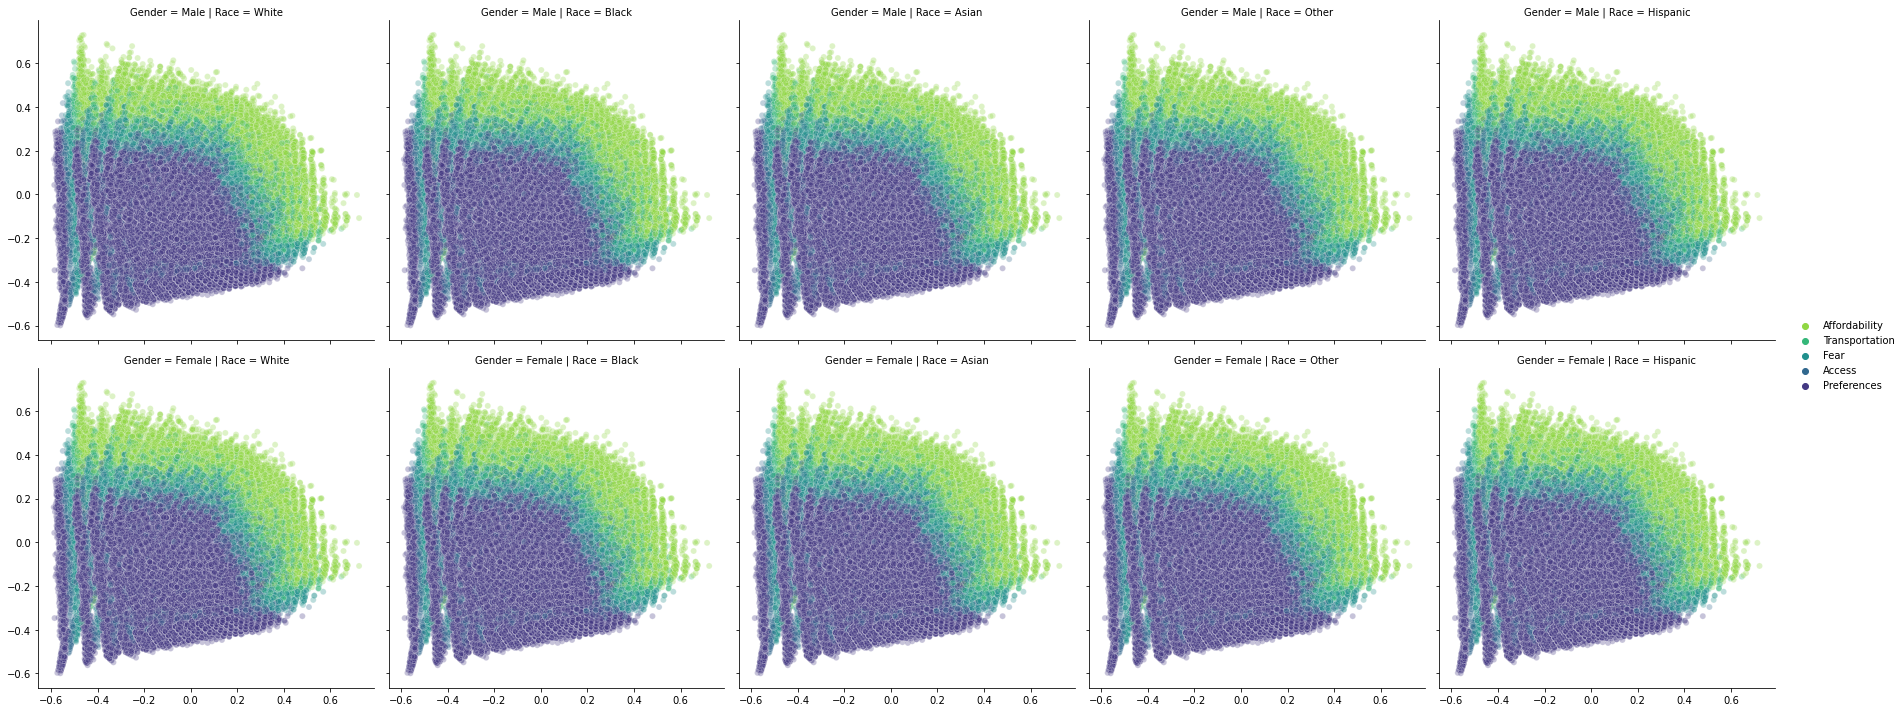

In [118]:
g = sns.FacetGrid(new_df1_mca,col="Race",row="Gender",height=5)
g.map(sns.scatterplot,
  x='x',y='y',
  hue='Food_Insecurity',
  hue_order=["Affordability","Transportation","Fear","Access","Preferences"],
  data=new_df1_mca, 
  palette='viridis_r',
  alpha=.3,
).add_legend()
plt.show()

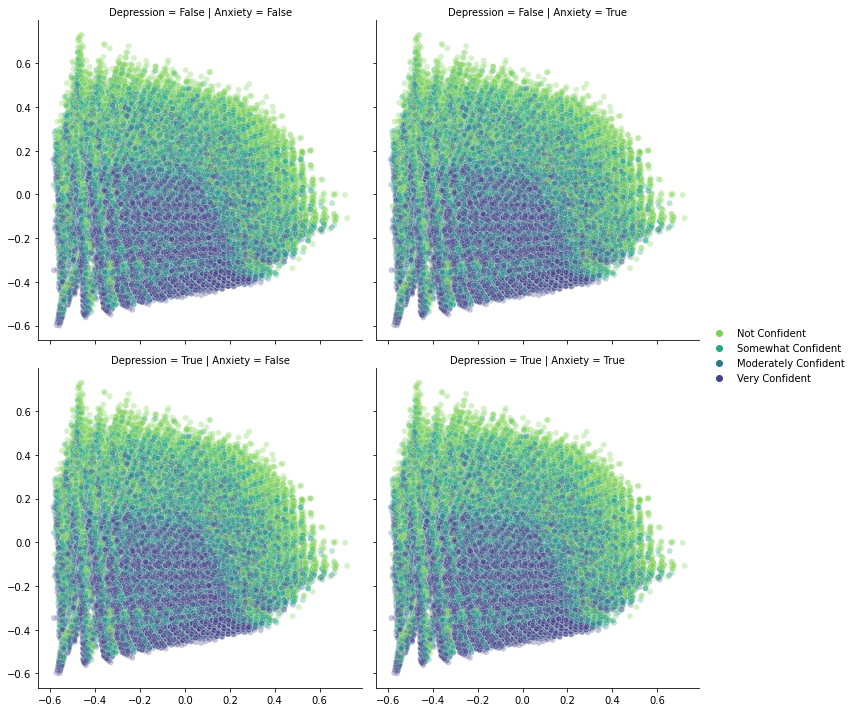

In [119]:
#plt.subplots(figsize=(20, 10.5))
g = sns.FacetGrid(new_df1_mca,col="Anxiety",row="Depression",height=5)
g.map(sns.scatterplot,
  x='x',y='y',
  hue='Food_Conf',
  data=new_df1_mca,
  hue_order = ["Not Confident","Somewhat Confident","Moderately Confident","Very Confident"],
  palette='viridis_r',
  alpha=.3,
).add_legend()
plt.show()

## Employment Variable Visualizations

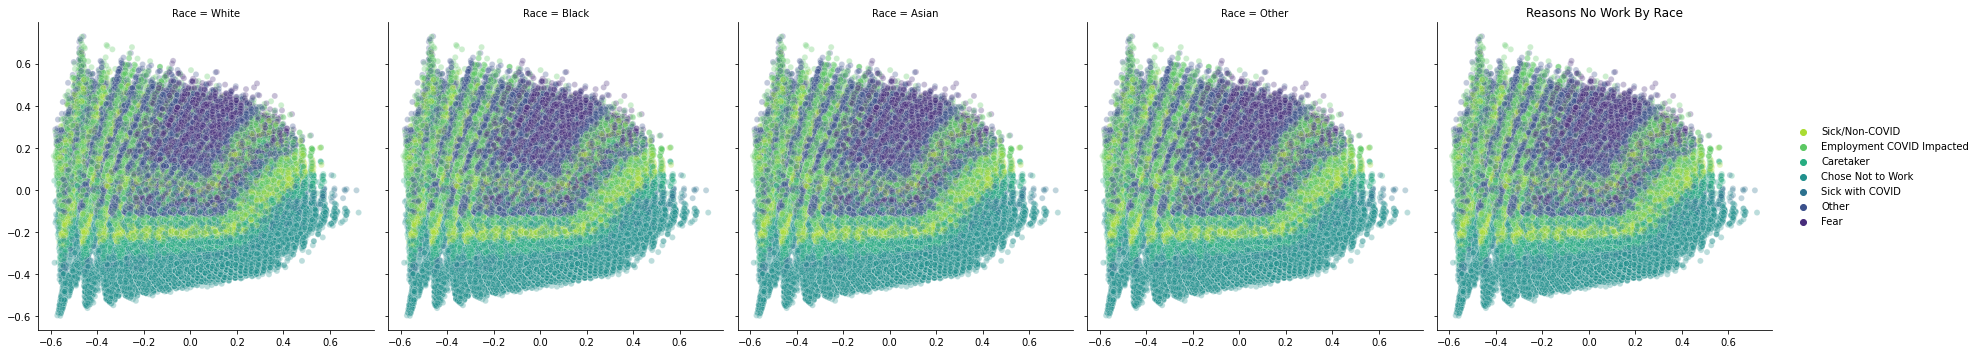

In [120]:
g = sns.FacetGrid(new_df1_mca,col="Race",height=5)
g.map(sns.scatterplot,
  x='x',y='y',
  hue='No_Work_Reasons',
  data=new_df1_mca,
  palette='viridis_r',
  alpha=.3,
).add_legend()
plt.title("Reasons No Work By Race")
plt.show()

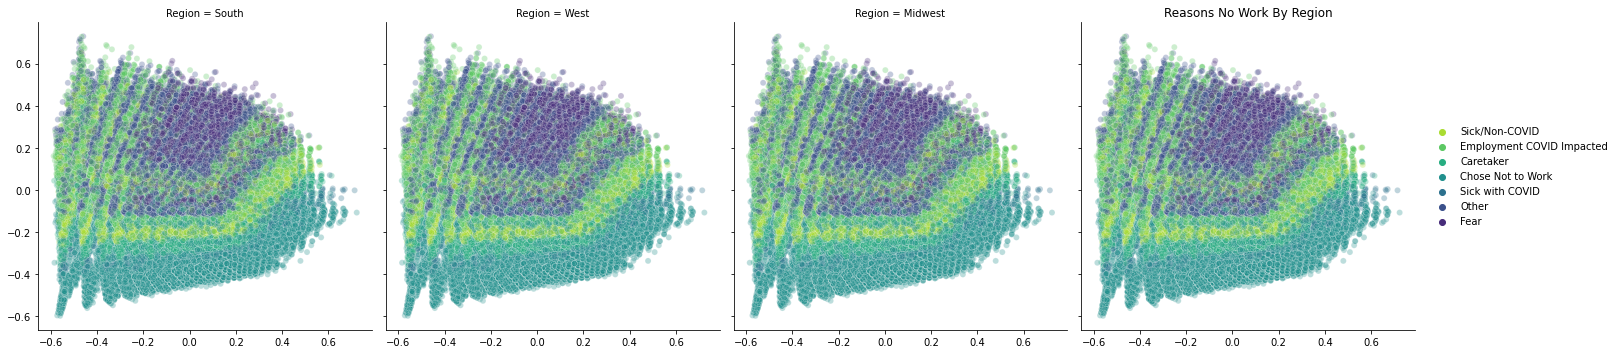

In [142]:
g = sns.FacetGrid(new_df1_mca,col="Region",height=5)
g.map(sns.scatterplot,
  x='x',y='y',
  hue='No_Work_Reasons',
  data=new_df1_mca,
  palette='viridis_r',
  alpha=.3,
).add_legend()
plt.title("Reasons No Work By Region")
plt.show()

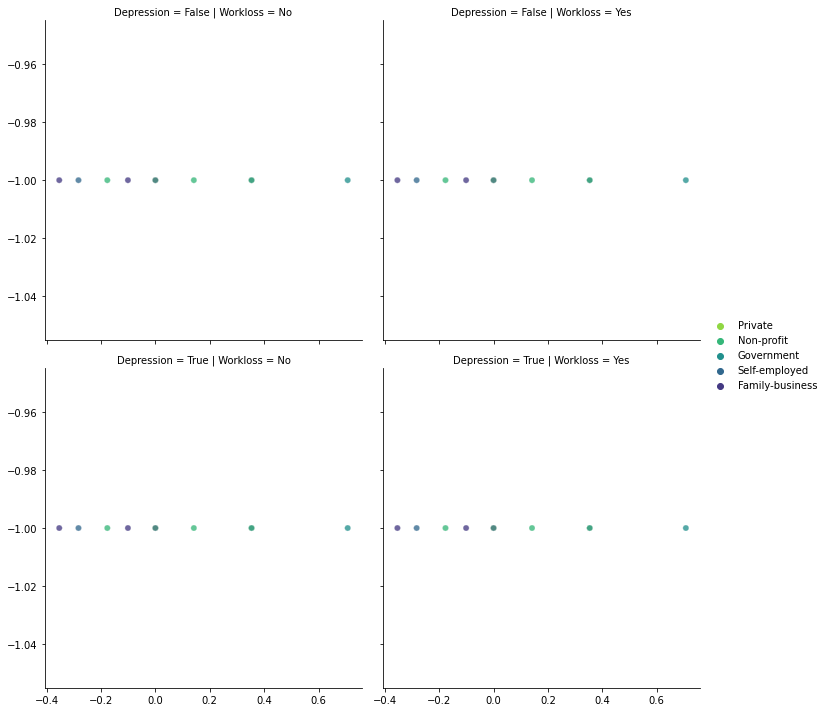

In [140]:
g = sns.FacetGrid(new_df2_mca,col="Workloss",row="Depression",height=5)
g.map(sns.scatterplot,
  x='x',y='y',
  hue='Occupation',
  data=new_df2_mca,
  palette='viridis_r',
  alpha=.3,
).add_legend()
plt.show()